### CNN auf dem MNIST Datensatz
- 8x8 Pixel Bilder handgeschriebener amerikanischer Ziffern

#### Versionsgeschichte

- 1.0 23.10.2023 Willi Hahn Initialversion
- 1.5 13.08.2024 Willi Hahn Umbau auf tensorflow


Falls tensorflow noch nicht installiert ist (ModuleNotFoundError), dann pip install tensorflow (oder vergleichbar installieren).
Achtung: tensorflow braucht ca 1,2 GB Festplatte.


In [1]:
# Bibliotheken laden
# falls noch nicht installiert, siehe Vorlesung 3 oder !pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import itertools 
from timeit import default_timer as timer

print("TensorFlow version:", tf.__version__)
print("sklearn version:", sklearn.__version__)

TensorFlow version: 2.17.0
sklearn version: 1.5.1


In [2]:
# Daten einlesen. Sie sind bereits in der Sklearn Bibliothek als "Hello World" Beispiel
# Allerdings nur mit 6x8 Pixel
digits = datasets.load_digits()

Images (x) Shape : (1797, 8, 8)
Target (y) Shape : (1797,)


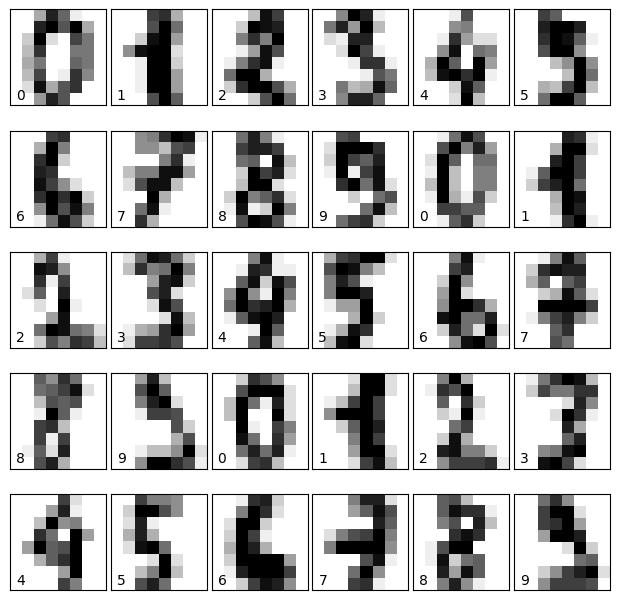

In [3]:
# Datenvorbereitung und Daten ansehen

X = digits['images']
y = digits['target']
target_names = digits['target_names']
print(f'Images (x) Shape : {X.shape}')
print(f'Target (y) Shape : {y.shape}')

# Display sample data
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(30): # die ersten 30 Zifferen plotten
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y[i]))

In [4]:
# Daten vorbereiten für CNN mit tensorflow
num_classes = 10
input_shape = (8, 8, 1)  #8x8 array bleibt als Input erhalten

# Trainings-/ Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(X_train.shape)
print(X_test.shape)

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# Make sure images have shape (8, 8, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")
#print(X_train)
#print(y_train)


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


(1437, 8, 8)
(360, 8, 8)
X_train shape: (1437, 8, 8, 1)
1437 train samples
360 test samples


In [5]:
# CNN Modell mit tensorflow berechnen
# nach https://keras.io/examples/vision/mnist_convnet/




model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(2, 2), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

BATCH_SIZE = 128
EPOCHS = 200
OPTIMIZER="adam"
METRICS=["accuracy"]
LOSS="categorical_crossentropy"
VALIDATION_SPLIT=0.1

t0 = timer()
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
history=model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, verbose=0)
# test          validation_data=(X_test, y_test))
print ('... model.fit() gestartet ...')
t1 = timer()
print ('Laufzeit Modellerstellung = ', round(t1 - t0, 0), ' sec')

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 6, 6, 8)        │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 16)       │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 778 (3.04 KB)

 Trainable params: 778 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

... model.fit() gestartet ...
Laufzeit Modellerstellung =  28.0  sec
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8483 - loss: 0.6832 
Test loss: 0.6843678951263428
Test accuracy: 0.8527777791023254


Test score: 0.6843678951263428
Test accuracy: 0.8527777791023254


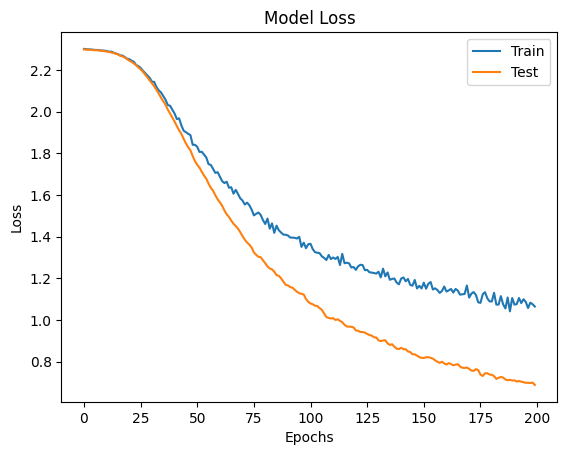

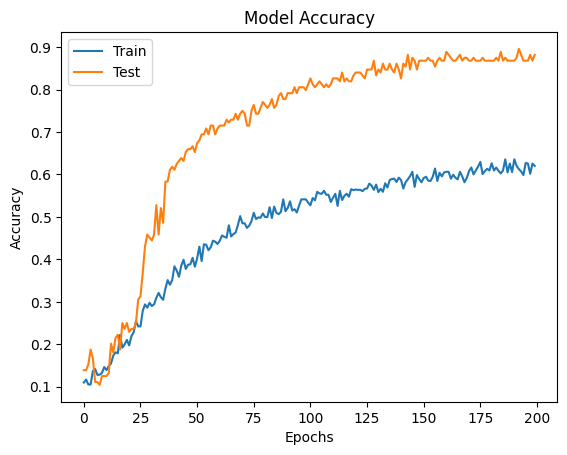

In [6]:
# Lernkurve zeichnen

score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,EPOCHS+1))
#print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


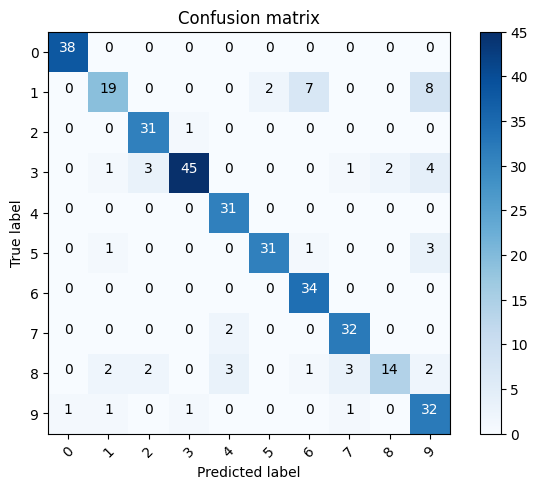

In [7]:
# Wahrheitsmatrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the test dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))



Test mit  7 Strich. Erwartet wird 7, vorhergesagt wird 7.


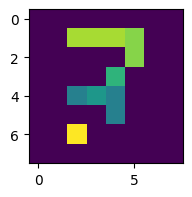

Ergebniswahrscheinlichkeiten = [[1.14953955e-23 2.02218259e-11 6.82498353e-07 1.65002750e-13
  9.18683973e-09 3.66763488e-18 5.79988584e-31 9.99999285e-01
  3.00892540e-11 1.76797882e-11]]


Test mit  7 aus Training. Erwartet wird 7, vorhergesagt wird 7.


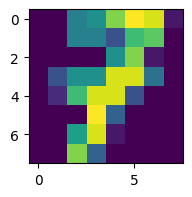

Ergebniswahrscheinlichkeiten = [[0.00251696 0.05080022 0.09887704 0.02898993 0.03942284 0.00246943
  0.00014024 0.6244598  0.14156124 0.01076228]]


Test mit  7 aus Training verschoben. Erwartet wird 7, vorhergesagt wird 7.


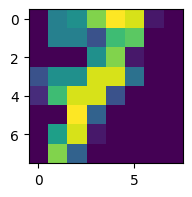

Ergebniswahrscheinlichkeiten = [[0.05211015 0.13148035 0.12976387 0.02763023 0.09617247 0.0056196
  0.00189598 0.2775807  0.26594502 0.0118017 ]]


Test mit  7 einfach. Erwartet wird 7, vorhergesagt wird 7.


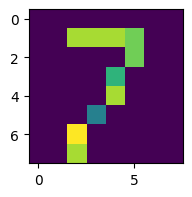

Ergebniswahrscheinlichkeiten = [[0.00246089 0.02276166 0.3350817  0.1480743  0.0013139  0.01873801
  0.00000873 0.4108428  0.0126211  0.04809694]]


Test mit  7 einfach verschoben. Erwartet wird 7, vorhergesagt wird 4.


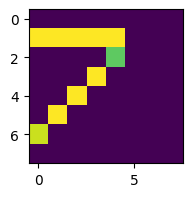

Ergebniswahrscheinlichkeiten = [[0.         0.         0.         0.         0.9999999  0.
  0.         0.00000011 0.         0.        ]]


Test mit  7 Strich klein. Erwartet wird 7, vorhergesagt wird 4.


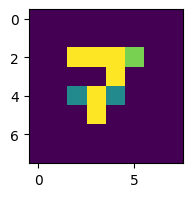

Ergebniswahrscheinlichkeiten = [[0.         0.00000002 0.         0.         0.9999994  0.
  0.         0.00000062 0.         0.        ]]


Test mit  7 Strich gedreht. Erwartet wird 7, vorhergesagt wird 4.


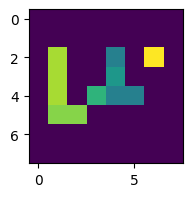

Ergebniswahrscheinlichkeiten = [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [8]:
# Test neuer Ziffern

# Als Test werden hier Ziffern mit der hand codiert. Der Einfachheit halber
# als array von 64 Grauwerte zwischen 0 und 255. Dazu wurde auf Papier
# eine Gitter mit 8x8 Zellen gezeichnet, darauf eine Ziffer und dann zeilenweise
# von links oben beginnend als ein Python array hingeschrieben.

def check_digit (title, X, Y):
    print ("\n")
    X = X.astype("float32") / 255
    target = model.predict(X.reshape(1, 8, 8, 1), verbose=0)
    print ("Test mit ", title+".", "Erwartet wird "+str(Y)+", vorhergesagt wird "+ str (np.argmax(target))+".")
    plt.figure(figsize=(2,2))
    plt.imshow(X)
    plt.show()
    print("Ergebniswahrscheinlichkeiten =", target)
    np.set_printoptions(suppress=True)



test7 = np.array([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  200,  200,  200,  188,  0,  0],
        [0,  0,  0,  0,  0,  188,  0,  0],
        [0,  0,  0,  0,  150,  0,  0,  0],
        [0,  0,  100,  122,  100,  0,  0,  0],
        [0,  0,  0,  0,  100,  0,  0,  0],
        [0,  0,  230,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0]])
test7_X7 = np.array(
       [[ 0,  0,  7,  8, 13, 16, 15,  1],
 [ 0,  0,  7,  7,  4, 11, 12,  0],
 [ 0,  0,  0,  0,  8, 13,  1,  0],
 [ 0,  4,  8,  8, 15, 15,  6,  0],
 [ 0,  2, 11, 15, 15,  4,  0,  0],
 [ 0,  0,  0, 16,  5,  0,  0,  0],
 [ 0,  0,  9, 15,  1,  0,  0,  0],
 [ 0,  0, 13,  5,  0,  0,  0,  0]])
test7_X7verschoben = np.array(
       [[ 0,  7,  8, 13, 16, 15,  1, 0],
 [0,  7,  7,  4, 11, 12,  0, 0],
 [0,  0,  0,  8, 13,  1,  0, 0],
 [4,  8,  8, 15, 15,  6,  0, 0],
 [2, 11, 15, 15,  4,  0,  0, 0],
 [0,  0, 16,  5,  0,  0,  0, 0],
 [0,  9, 15,  1,  0,  0,  0, 0],
 [0, 13,  5,  0,  0,  0,  0, 0]])
test7einfach = np.array([
        [ 0,  0, 0,  0,  0,  0,  0,  0],
        [0,  0, 20, 20, 20,  18,  0,  0],
        [0,  0,  0,  0,  0,  18,  0,  0],
        [0,  0,  0,  0,  15,  0,  0,  0],
        [0,  0,  0,  0,  20,  0,  0,  0],
        [0,  0,  0,  10,  0,  0,  0,  0],
        [0,  0,  23,  0,  0,  0,  0,  0],
        [0,  0,  20,  0,  0,  0,  0,  0]])
test7shift = np.array([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [250,  250,  250,  250,  250,  0,  0,  0],
        [0,  0,  0,  0,  188,  0,  0,  0],
        [0,  0,  0,  250,  0,  0,  0,  0],
        [0,  0,  250,  0,  0,  0,  0,  0],
        [0,  250,  0,  0,  0,  0,  0,  0],
        [230,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0]])
test7small = np.array ([[ 0,   0,   0,  0,  0,  0,  0,  0],
        [0,  0,   0,  0,  0,  0,  0,  0],
        [0,  0,   250,  250,  250,  200,  0,  0],
        [0,  0,  0,  0,  250,  0,  0,  0],
        [0,  0,  120,  250,  120,  0,  0, 0],
        [0,  0,  0, 250,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0]])

test_template = np.array ([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0],
        [0,  0,  0,  0,  0,  0,  0,  0]])

check_digit ("7 Strich", test7,7)
check_digit ("7 aus Training", test7_X7,7)
check_digit ("7 aus Training verschoben", test7_X7verschoben,7)
check_digit ("7 einfach", test7einfach,7)
check_digit ("7 einfach verschoben", test7shift,7)
check_digit ("7 Strich klein", test7small,7)
# Test einer gedrehten 7
check_digit ("7 Strich gedreht", test7.transpose(),7)


In [9]:
# Testtemplates bauen

# Ausgabe von print muss in einem Editor (separat, damit hier im Notebook durch falsches Ersetzen etwas passiert.)
# von . auf , umgestellt werden, danach letzte , Blockspalte auch entfernen.

print(X[700])

[[ 0.  0.  3. 12. 16. 16.  3.  0.]
 [ 0.  2. 16. 16. 11. 16.  4.  0.]
 [ 0.  8. 14.  2. 10. 16.  1.  0.]
 [ 0.  5.  5.  3. 16.  4.  0.  0.]
 [ 0.  0.  0. 11. 12.  0.  0.  0.]
 [ 0.  0.  3. 16.  5.  2.  3.  0.]
 [ 0.  0.  3. 16. 12. 15.  6.  0.]
 [ 0.  0.  0. 15. 16.  8.  0.  0.]]
